In [133]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQl6AEsGNO6cIkscI0aTDM0KhopmyM7mNTzRuCSZLDFbibTQ2FqcQ)

https://github.com/brendan-drew/County-Medicare-Spending
    
Analysis of Medicare spending by County

In [134]:
df_medi = pd.read_csv('cleaned_medicare_county_all.csv')

In [135]:
df_medi.head()

,Unnamed: 0,unnamed:_0,state,county,state_and_county_fips_code,beneficiaries_with_part_a_and_part_b,ffs_beneficiaries,ma_beneficiaries,ma_participation_rate,average_age,...,ambulance_per_capita_standardized_costs,ambulance_per_user_standardized_costs,#_ambulance_users,%_of_beneficiaries_using_ambulance,ambulance_events_per_1000_beneficiaries,number_of_acute_hospital_readmissions,hospital_readmission_rate,emergency_department_visits,emergency_department_visits_per_1000_beneficiaries,year
0,2,2,AK,ANCHORAGE,2020,21981.0,21752.0,229.0,1.04,69.0,...,80.40,703.82,2485.0,0.1142,221.0,825.0,0.1639,13419.0,617.0,2007
1,3,3,AK,BETHEL,2050,661.0,661.0,0.0,0.00,71.0,...,850.08,5853.13,96.0,0.1452,454.0,40.0,0.1961,17.0,26.0,2007
2,4,4,AK,BRISTOL BAY,2060,NaN,630.0,NaN,NaN,68.0,...,157.62,1460.27,68.0,0.1079,192.0,20.0,0.1538,312.0,495.0,2007
3,5,5,AK,DENALI,2068,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
4,6,6,AK,DILLINGHAM,2070,NaN,387.0,NaN,NaN,71.0,...,378.53,3677.59,40.0,0.1029,258.0,17.0,0.1635,41.0,106.0,2007


In [136]:
df_medi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25088 entries, 0 to 25087
Columns: 221 entries, Unnamed: 0 to year
dtypes: float64(215), int64(4), object(2)
memory usage: 42.3+ MB


In [137]:
df_medi.describe()

,Unnamed: 0,unnamed:_0,state_and_county_fips_code,beneficiaries_with_part_a_and_part_b,ffs_beneficiaries,ma_beneficiaries,ma_participation_rate,average_age,percent_female,percent_male,...,ambulance_per_capita_standardized_costs,ambulance_per_user_standardized_costs,#_ambulance_users,%_of_beneficiaries_using_ambulance,ambulance_events_per_1000_beneficiaries,number_of_acute_hospital_readmissions,hospital_readmission_rate,emergency_department_visits,emergency_department_visits_per_1000_beneficiaries,year
count,25088.000000,25088.000000,25088.000000,2.461900e+04,25056.000000,24619.000000,24619.000000,25056.000000,25040.000000,25040.000000,...,24764.000000,24764.000000,24764.000000,24764.000000,24764.000000,24459.000000,24459.000000,25040.000000,25040.000000,25088.000000
mean,12764.389668,1595.889668,30433.607781,1.494444e+04,10615.425407,4147.962955,18.260714,71.338163,54.241135,45.758973,...,127.897625,1172.981451,1237.225852,0.107054,325.711436,608.325933,0.174855,6770.929832,639.550998,2010.500000
std,7369.280774,919.860301,15130.319015,3.939407e+04,25031.633746,16019.633856,12.659863,2.050643,2.594570,2.594576,...,87.127116,616.150278,2964.618384,0.036182,229.932692,1743.009518,0.030203,15244.923961,146.247132,2.291334
min,2.000000,2.000000,1001.000000,1.200000e+01,12.000000,0.000000,0.000000,62.000000,40.130000,31.710000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,26.000000,2007.000000
25%,6383.000000,799.750000,19002.500000,2.251000e+03,1792.000000,240.000000,8.590000,70.000000,52.880000,43.970000,...,77.015000,815.410000,157.000000,0.089400,182.000000,92.000000,0.156300,1112.000000,545.000000,2008.750000
50%,12764.000000,1594.500000,29182.000000,4.944000e+03,3871.000000,725.000000,15.310000,71.000000,54.600000,45.400000,...,113.975000,1018.990000,415.000000,0.113400,282.000000,205.000000,0.175400,2594.500000,638.000000,2010.500000
75%,19145.000000,2394.250000,45083.500000,1.189600e+04,9237.250000,2302.000000,24.785000,73.000000,56.030000,47.120000,...,157.892500,1331.977500,1058.000000,0.131200,407.000000,493.000000,0.193100,6199.250000,730.000000,2012.250000
max,25526.000000,3189.000000,56045.000000,1.214085e+06,610829.000000,684502.000000,69.340000,78.000000,68.290000,59.870000,...,2026.380000,12096.060000,69351.000000,0.280000,3481.000000,56952.000000,0.386100,380601.000000,2320.000000,2014.000000


In [138]:
# import pandas_profiling as pp
# pp.ProfileReport(df_medi)

In [139]:
mcare1 = df_medi[['state', 'county', 'year', 'average_age', 'percent_male', 'percent_female', 
        'percent_eligible_for_medicaid', 'procedures_actual_costs', 
       'total_actual_costs', 'actual_per_capita_costs', 'hospice_actual_costs', 
       'imaging_actual_costs', 'tests_actual_costs', 'dme_actual_costs', 'part_b_drugs_actual_costs', 
       'ambulance_actual_costs', 'hospital_readmission_rate', 'emergency_department_visits']]

mcare1.head()

,state,county,year,average_age,percent_male,percent_female,percent_eligible_for_medicaid,procedures_actual_costs,total_actual_costs,actual_per_capita_costs,hospice_actual_costs,imaging_actual_costs,tests_actual_costs,dme_actual_costs,part_b_drugs_actual_costs,ambulance_actual_costs,hospital_readmission_rate,emergency_department_visits
0,AK,ANCHORAGE,2007,69.0,46.71,53.29,25.23,9948252.37,1.454969e+08,6688.90,2385576.97,5326489.10,3409019.79,3449503.03,4964305.75,1959708.67,0.1639,13419.0
1,AK,BETHEL,2007,71.0,51.13,48.87,59.46,144239.83,4.999320e+06,7563.27,0.00,24270.65,17129.17,51971.34,NaN,604176.46,0.1961,17.0
2,AK,BRISTOL BAY,2007,68.0,50.63,49.37,19.21,253170.41,3.700871e+06,5874.40,NaN,108743.88,89983.38,82758.64,93777.59,111272.17,0.1538,312.0
3,AK,DENALI,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,DILLINGHAM,2007,71.0,51.42,48.58,51.68,123053.76,3.975036e+06,10271.41,NaN,31771.02,20146.42,23715.10,5845.17,156522.44,0.1635,41.0


In [140]:
mcare1.isna().sum()

state                               0
county                              0
year                                0
average_age                        32
percent_male                       48
percent_female                     48
percent_eligible_for_medicaid     209
procedures_actual_costs            48
total_actual_costs                 40
actual_per_capita_costs            40
hospice_actual_costs             1938
imaging_actual_costs               48
tests_actual_costs                 46
dme_actual_costs                   50
part_b_drugs_actual_costs          61
ambulance_actual_costs            324
hospital_readmission_rate         629
emergency_department_visits        48
dtype: int64

In [141]:
mcare1.iloc[:,3:] = mcare1.iloc[:,3:].apply(lambda x: x.fillna(x.mean()))

In [142]:
mcare1.isna().sum()

state                            0
county                           0
year                             0
average_age                      0
percent_male                     0
percent_female                   0
percent_eligible_for_medicaid    0
procedures_actual_costs          0
total_actual_costs               0
actual_per_capita_costs          0
hospice_actual_costs             0
imaging_actual_costs             0
tests_actual_costs               0
dme_actual_costs                 0
part_b_drugs_actual_costs        0
ambulance_actual_costs           0
hospital_readmission_rate        0
emergency_department_visits      0
dtype: int64

In [143]:
mcare1.shape

(25088, 18)

In [144]:
mcare1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25088 entries, 0 to 25087
Data columns (total 18 columns):
state                            25088 non-null object
county                           25088 non-null object
year                             25088 non-null int64
average_age                      25088 non-null float64
percent_male                     25088 non-null float64
percent_female                   25088 non-null float64
percent_eligible_for_medicaid    25088 non-null float64
procedures_actual_costs          25088 non-null float64
total_actual_costs               25088 non-null float64
actual_per_capita_costs          25088 non-null float64
hospice_actual_costs             25088 non-null float64
imaging_actual_costs             25088 non-null float64
tests_actual_costs               25088 non-null float64
dme_actual_costs                 25088 non-null float64
part_b_drugs_actual_costs        25088 non-null float64
ambulance_actual_costs           25088 non-null float64

In [145]:
mcare1.head()

,state,county,year,average_age,percent_male,percent_female,percent_eligible_for_medicaid,procedures_actual_costs,total_actual_costs,actual_per_capita_costs,hospice_actual_costs,imaging_actual_costs,tests_actual_costs,dme_actual_costs,part_b_drugs_actual_costs,ambulance_actual_costs,hospital_readmission_rate,emergency_department_visits
0,AK,ANCHORAGE,2007,69.000000,46.710000,53.290000,25.230000,9.948252e+06,1.454969e+08,6688.90000,2.385577e+06,5.326489e+06,3.409020e+06,3.449503e+06,4.964306e+06,1.959709e+06,0.163900,13419.000000
1,AK,BETHEL,2007,71.000000,51.130000,48.870000,59.460000,1.442398e+05,4.999320e+06,7563.27000,0.000000e+00,2.427065e+04,1.712917e+04,5.197134e+04,3.183871e+06,6.041765e+05,0.196100,17.000000
2,AK,BRISTOL BAY,2007,68.000000,50.630000,49.370000,19.210000,2.531704e+05,3.700871e+06,5874.40000,3.287047e+06,1.087439e+05,8.998338e+04,8.275864e+04,9.377759e+04,1.112722e+05,0.153800,312.000000
3,AK,DENALI,2007,71.338163,45.758973,54.241135,21.255956,6.344861e+06,9.827689e+07,8344.81477,3.287047e+06,2.668152e+06,2.698459e+06,2.416958e+06,3.183871e+06,1.421522e+06,0.174855,6770.929832
4,AK,DILLINGHAM,2007,71.000000,51.420000,48.580000,51.680000,1.230538e+05,3.975036e+06,10271.41000,3.287047e+06,3.177102e+04,2.014642e+04,2.371510e+04,5.845170e+03,1.565224e+05,0.163500,41.000000


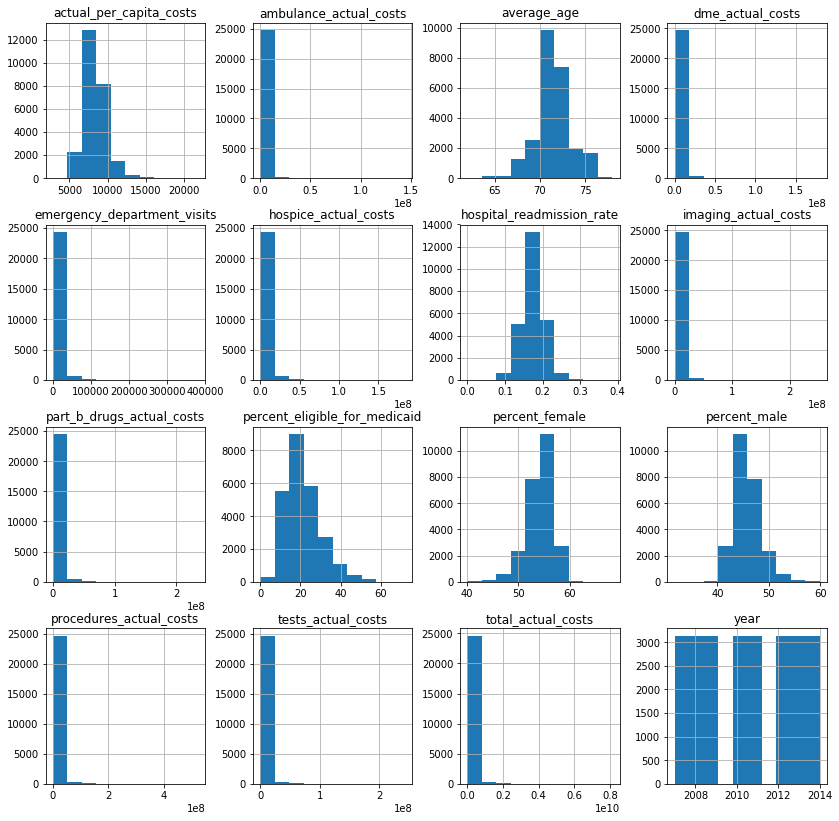

In [146]:
mcare1.drop(['state','county'], axis = 1).hist(figsize = (14,14))
plt.show()

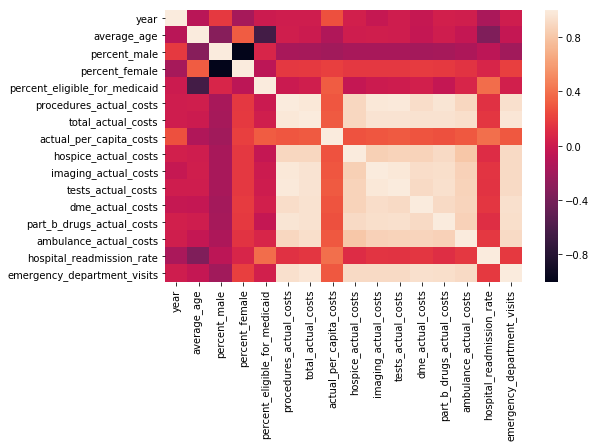

In [147]:
plt.figure(figsize = (8,5))
sns.heatmap(mcare1.corr())
plt.show()

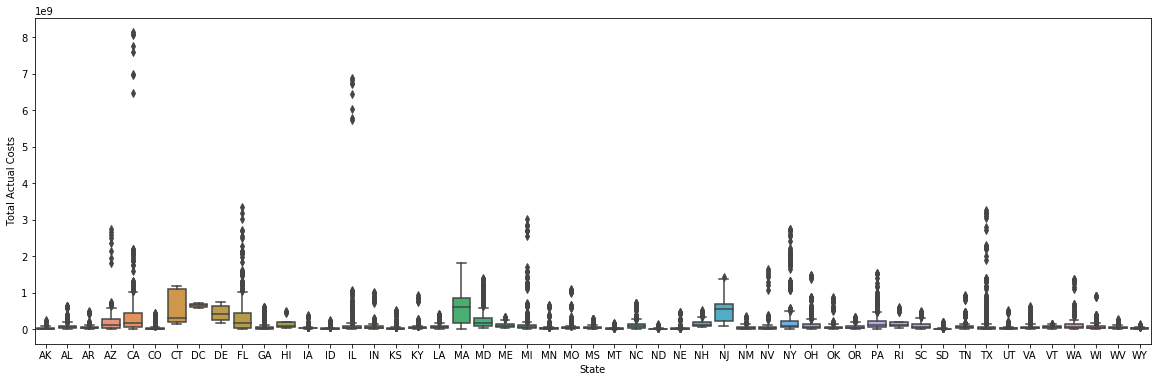

In [148]:
plt.subplots(figsize=(20,6))
sns.boxplot(x='state', y='total_actual_costs', data=mcare1)
plt.ylabel('Total Actual Costs')
plt.xlabel('State')
plt.show()

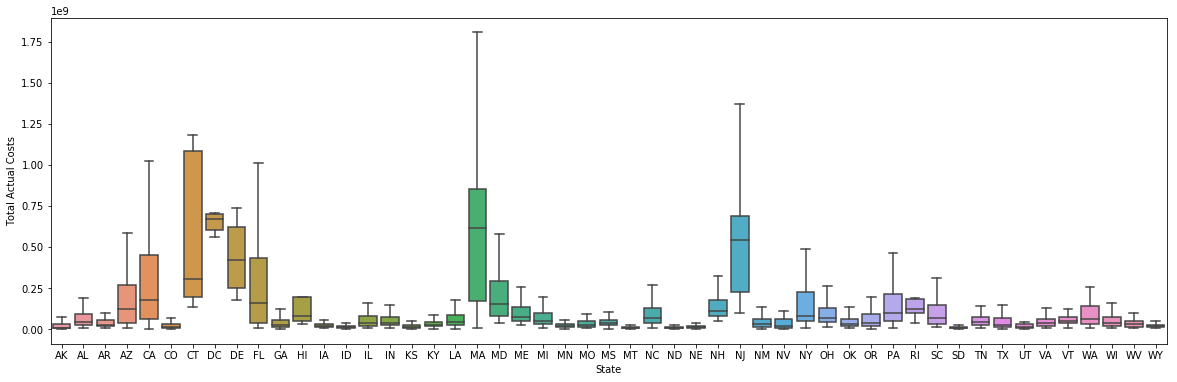

In [149]:
plt.subplots(figsize=(20,6))
sns.boxplot(x='state', y='total_actual_costs', data=mcare1, showfliers = False)
plt.ylabel('Total Actual Costs')
plt.xlabel('State')
plt.show()

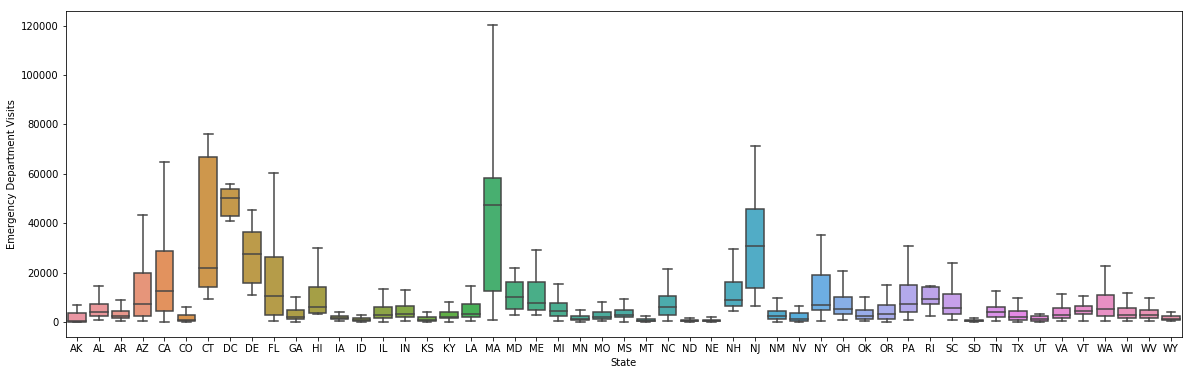

In [150]:
plt.subplots(figsize=(20,6))
sns.boxplot(x='state', y='emergency_department_visits', data=mcare1, showfliers = False)
plt.ylabel('Emergency Department Visits')
plt.xlabel('State')
plt.show()

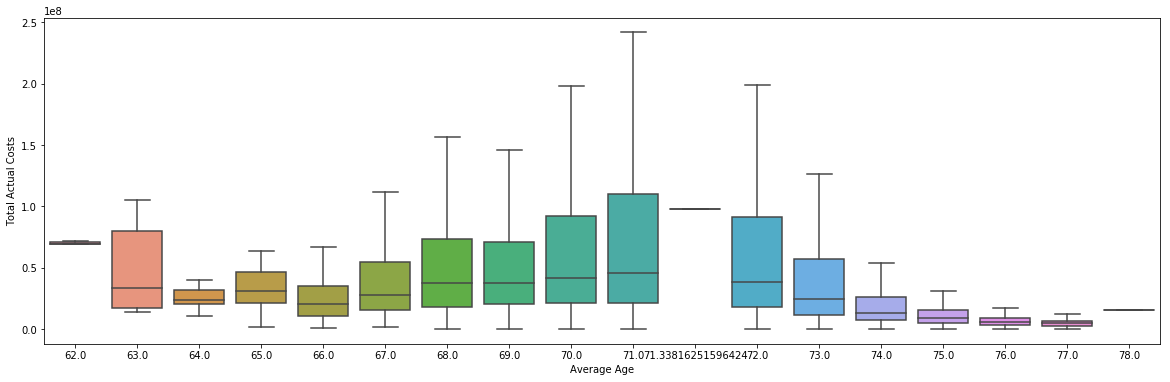

In [151]:
plt.subplots(figsize=(20,6))
sns.boxplot(x='average_age', y='total_actual_costs', data=mcare1, showfliers = False)
plt.ylabel('Total Actual Costs')
plt.xlabel('Average Age')
plt.show()

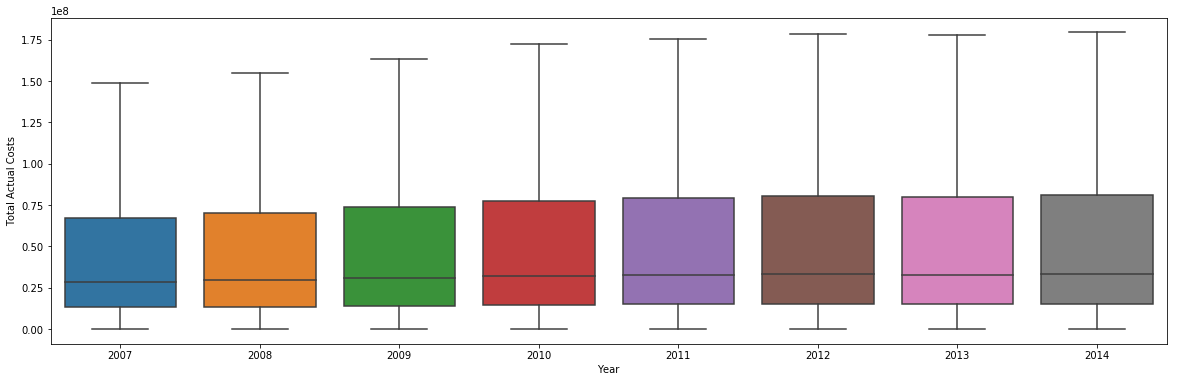

In [152]:
plt.subplots(figsize=(20,6))
sns.boxplot(x='year', y='total_actual_costs', data=mcare1, showfliers = False)
plt.ylabel('Total Actual Costs')
plt.xlabel('Year')
plt.show()

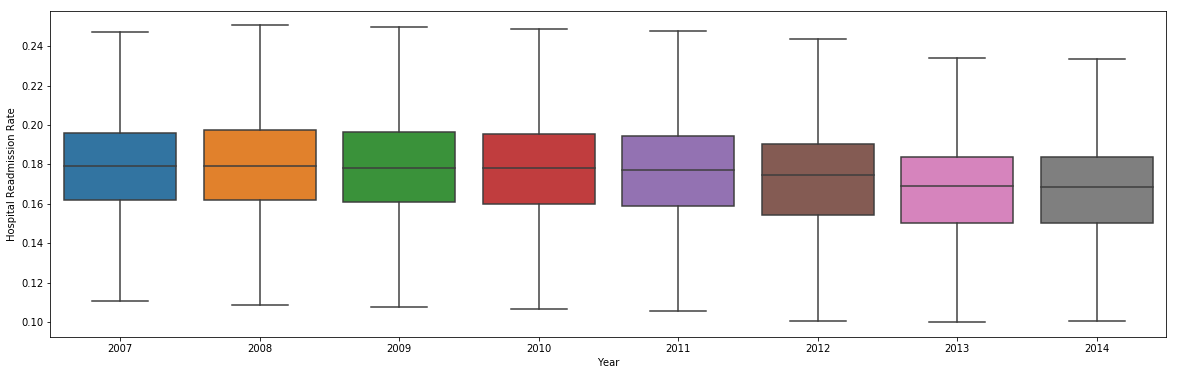

In [153]:
plt.subplots(figsize=(20,6))
sns.boxplot(x='year', y='hospital_readmission_rate', data=mcare1, showfliers = False)
plt.ylabel('Hospital Readmission Rate')
plt.xlabel('Year')
plt.show()

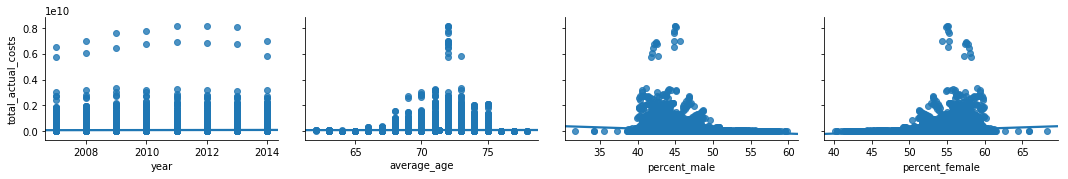

In [154]:
list = ['year', 'average_age', 'percent_male','percent_female']
sns.pairplot(mcare1, x_vars = list[0:6], y_vars = ['total_actual_costs'], aspect = 1.5, kind = 'reg', palette = 'hus1')
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 

In [156]:
X = mcare1.drop(['total_actual_costs','state','county'], axis = 1)
y = mcare1.total_actual_costs

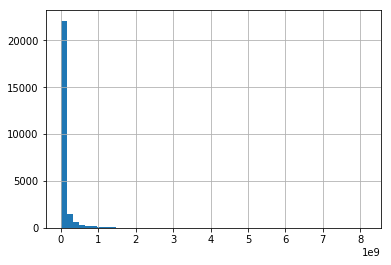

In [157]:
mcare1.total_actual_costs.hist(bins = 50)
plt.show()

In [158]:
y = np.log(y) # unskewing y

In [159]:
X.var()

year                             5.250209e+00
average_age                      4.199775e+00
percent_male                     6.718947e+00
percent_female                   6.718914e+00
percent_eligible_for_medicaid    7.816645e+01
procedures_actual_costs          3.410581e+14
actual_per_capita_costs          2.000356e+06
hospice_actual_costs             6.173138e+13
imaging_actual_costs             7.216410e+13
tests_actual_costs               7.183799e+13
dme_actual_costs                 3.056948e+13
part_b_drugs_actual_costs        7.497305e+13
ambulance_actual_costs           1.673689e+13
hospital_readmission_rate        8.893783e-04
emergency_department_visits      2.319630e+08
dtype: float64

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.iloc[:,1:] = scaler.fit_transform(X.iloc[:,1:])

In [161]:
dum = pd.get_dummies(X.year)
X = pd.concat([X, dum], axis = 1)
X = X.drop('year', axis = 1)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

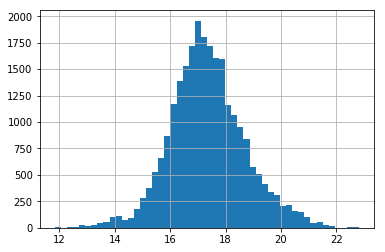

In [163]:
y.hist(bins = 50)
plt.show()

In [164]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as scs
import statistics
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [165]:
simple_model = sm.OLS(y_train, X_train)
simple_results = simple_model.fit()
simple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_actual_costs   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1552.
Date:                Mon, 14 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:15:00   Log-Likelihood:                -25018.
No. Observations:               20070   AIC:                         5.008e+04
Df Residuals:                   20048   BIC:                         5.025e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
average_age                      -0.6729      0.009    -75.548      0.000      -0.690      -0.655
percent_male                     -9.3487     15.293     -0.611      0.541     -39.325      20.627
percent_female                   -8.9430     15.293     -0.585      0.559     -38.919      21.033
percent_eligible_for_medicaid    -0.3971      0.009    -46.515      0.000      -0.414      -0.380
procedures_actual_costs          -0.1249      0.062     -2.004      0.045      -0.247      -0.003
actual_per_capita_costs           0.1873      0.008     23.990      0.000       0.172       0.203
hospice_actual_costs             -0.2480      0.017    -14.626      0.000      -0.281      -0.215
imaging_actual_costs             -0.0952      0.042     -2.266      0.023      -0.178      -0.013
tests_actual_costs                0.0735      0.046      1.605      0.109      -0.016       0.163
dme_actual_costs                  0.2012      0.022      9.332      0.000       0.159       0.243
part_b_drugs_actual_costs         0.2261      0.026      8.774      0.000       0.176       0.277
ambulance_actual_costs           -0.4719      0.015    -30.478      0.000      -0.502      -0.442
hospital_readmission_rate        -0.0487      0.007     -6.628      0.000      -0.063      -0.034
emergency_department_visits       1.1365      0.029     39.454      0.000       1.080       1.193
2007                             17.3442      0.018    954.457      0.000      17.309      17.380
2008                             17.3344      0.017    995.869      0.000      17.300      17.368
2009                             17.3624      0.017   1019.769      0.000      17.329      17.396
2010                             17.3467      0.017   1037.936      0.000      17.314      17.379
2011                             17.3550      0.017   1025.905      0.000      17.322      17.388
2012                             17.3289      0.017   1022.777      0.000      17.296      17.362
2013                             17.3333      0.017   1004.537      0.000      17.300      17.367
2014                             17.3638      0.018    980.544      0.000      17.329      17.399
==============================================================================
Omnibus:                    11524.214   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           608899.840
Skew:                          -2.043   Prob(JB):                         0.00
Kurtosis:                      29.673   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might in

In [212]:
score_ols = simple_results.rsquared
print('R2:',score_ols)

R2: 0.619174188604414


In [213]:
from sklearn.metrics import mean_squared_error

In [239]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
score_lr = model.score(X_test, y_test)
print('MSE:',mean_squared_error(y_pred_lr, y_test))
MSE_lr = mean_squared_error(y_pred_lr, y_test)
print('R2:',score_lr)

MSE: 0.6932408300768307
R2: 0.6249654769613979


In [215]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 5, random_state = 1)

In [216]:
model = regressor.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)
score_dt = model.score(X_test, y_test)
print('MSE:',mean_squared_error(y_pred_dt, y_test))
MSE_dt = mean_squared_error(y_pred_dt, y_test)
print('R2:', score_dt)

MSE: 0.03886079301981941
R2: 0.9789768023711548


In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [218]:
list = []
for i in range(1,10): 
    regr = RandomForestRegressor(n_estimators = 15, max_depth=i,
                             random_state=1)
    model = regr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    list.append(model.score(X_test, y_test))
pd.DataFrame(list)

,0
0,0.630905
1,0.886252
2,0.964940
3,0.982580
4,0.986941
5,0.988880
6,0.991414
7,0.992707
8,0.993895


In [219]:
list = []
for i in range(1,15): 
    regr = RandomForestRegressor(n_estimators=i, max_depth=6,
                             random_state=1)
    model = regr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    list.append(model.score(X_test, y_test))

In [220]:
list = pd.DataFrame(list)
list

,0
0,0.986740
1,0.988729
2,0.989493
3,0.989645
4,0.989828
5,0.989693
6,0.989286
7,0.988936
8,0.988942
9,0.988886


In [222]:
regr = RandomForestRegressor(n_estimators= 5, max_depth=6,
                             random_state=1)
model = regr.fit(X_train, y_train)
y_pred_ranf = model.predict(X_test)
score_ranf = model.score(X_test, y_test)
print('MSE:',mean_squared_error(y_pred_ranf, y_test))
MSE_ranf = mean_squared_error(y_pred_ranf, y_test)
print('R2:',score_ranf)

MSE: 0.018802348718981846
R2: 0.9898281670988028


In [223]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=79, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [224]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=79,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [225]:
y_pred_xgb = xgb.predict(X_test)
score_xgb = xgb.score(X_test, y_test)
print('MSE:',mean_squared_error(y_pred_xgb, y_test))
MSE_xgb = mean_squared_error(y_pred_xgb, y_test)
print('R2:', score_xgb )

MSE: 0.009393354855568598
R2: 0.9949183138021457


In [226]:
from sklearn.ensemble import GradientBoostingRegressor

In [227]:
gbr = GradientBoostingRegressor(n_estimators=79, random_state=1)

In [228]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=79, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [229]:
y_pred_gbr = gbr.predict(X_test)
score_gbr = gbr.score(X_test, y_test)
print('MSE:',mean_squared_error(y_pred_gbr, y_test))
print('R2:',score_gbr)
MSE_gbr = mean_squared_error(y_pred_gbr, y_test)
score_gbr

MSE: 0.012442671105297587
R2: 0.993268672269658


0.993268672269658

In [54]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 44 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 23 days
H2O cluster name:,H2O_from_python_m_vwqcyl
H2O cluster total nodes:,1
H2O cluster free memory:,1.368 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [55]:
mcare2 = X.rename(columns = {2007 : '2007', 2008 : '2008', 2009 : '2009', 2010 : '2010', 2011 : '2011', 
                    2012 : '2012', 2013 : '2013', 2014 : '2014'})

In [56]:
mcare2 = pd.concat([mcare2, y], axis = 1)

In [57]:
mcare2.columns

Index(['average_age', 'percent_male', 'percent_female',
       'percent_eligible_for_medicaid', 'procedures_actual_costs',
       'actual_per_capita_costs', 'hospice_actual_costs',
       'imaging_actual_costs', 'tests_actual_costs', 'dme_actual_costs',
       'part_b_drugs_actual_costs', 'ambulance_actual_costs',
       'hospital_readmission_rate', 'emergency_department_visits', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       'total_actual_costs'],
      dtype='object')

In [58]:
# Load data into H2O
df = h2o.H2OFrame(mcare2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [59]:
df.describe()

Rows:25088
Cols:23




,average_age,percent_male,percent_female,percent_eligible_for_medicaid,procedures_actual_costs,actual_per_capita_costs,hospice_actual_costs,imaging_actual_costs,tests_actual_costs,dme_actual_costs,part_b_drugs_actual_costs,ambulance_actual_costs,hospital_readmission_rate,emergency_department_visits,2007,2008,2009,2010,2011,2012,2013,2014,total_actual_costs
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,int,int,int,int,int,int,int,real
mins,-4.556769751315379,-5.420041723056214,-5.44403698739407,-2.4042470956025777,-0.3427840691807369,-3.888984839535519,-0.4183709864932077,-0.31362398427790683,-0.31812874439618094,-0.4368086884583635,-0.36765243376829343,-0.34747608675420494,-5.8633324354648995,-0.44378968708927446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.83638106585536
mean,-1.2688263138573218e-15,-5.582835780972216e-15,1.4863393962328627e-15,4.249541478344409e-16,-6.45741963302387e-17,-3.9877398435515827e-16,-4.5315225494904345e-18,-1.3594567648471304e-17,-2.6056254659570002e-17,-1.586032892321652e-17,-1.2688263138573217e-16,2.4923374022197392e-17,1.468213306034901e-15,-4.0783702945413916e-17,0.125,0.125,0.125,0.125,0.125,0.12500000000000003,0.12500000000000003,0.12500000000000003,17.348848586575617
maxs,3.250795805227912,5.443982047366047,5.420013097867398,5.743018455515433,27.971655356472127,9.534185502635047,22.98849736901556,29.41038935359687,28.40680818676319,32.02960832324673,26.780889701821273,34.92622669574426,7.083549342706439,24.545591385229788,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.81946899803311
sigma,1.0000199304427564,1.0000199304427568,1.0000199304427557,1.000019930442757,1.0000199304427555,1.0000199304427557,1.0000199304427568,1.000019930442755,1.0000199304427557,1.000019930442756,1.0000199304427555,1.0000199304427586,1.0000199304427575,1.0000199304427575,0.33072550525745553,0.33072550525745553,0.33072550525745553,0.33072550525745553,0.3307255052574556,0.3307255052574556,0.3307255052574556,0.3307255052574556,1.3630988532608366
zeros,32,0,0,0,0,0,0,0,0,0,0,0,0,48,21952,21952,21952,21952,21952,21952,21952,21952,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-1.140959820327689,0.3669027569272352,-0.3669453992534146,0.4495014793621233,0.19512185605528448,-1.1708277385568733,-0.11473790780293593,0.3129378985002164,0.08383646776878809,0.1867555979475287,0.20562796395216093,0.13155401598011723,-0.3673626777796312,0.43651066850844816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7956650293594
1,-0.16501412575977753,2.072122397029026,-2.072169169738347,4.32123408820246,-0.33576054247791903,-0.5525974600205648,-0.4183709864932077,-0.31123607802578773,-0.3163601322261364,-0.427753244017717,1.613420038008782e-16,-0.19979152724084673,0.7123824485014286,-0.443461388306699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.424812531159054
2,-1.6289326676116445,1.879224247696244,-1.8792705531676537,-0.23141672996358012,-0.3298620057973434,-1.74672645633976,-1.7187938138385017e-15,-0.3012919400434879,-0.3077643340699694,-0.4221847696673757,-0.35688445607048025,-0.3202767791007,-0.7060404968926343,-0.4240917601347494,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.12407872559362


In [112]:
y = "total_actual_costs"
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [113]:
aml = H2OAutoML(max_runtime_secs = 360, seed = 1, project_name = "total_actual_costs")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [114]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XRT_1_AutoML_20190114_130159,0.0257562,0.160488,0.0257562,0.0666791,0.00996824
XRT_1_AutoML_20190114_140600,0.0257562,0.160488,0.0257562,0.0666791,0.00996824
StackedEnsemble_BestOfFamily_AutoML_20190114_130159,0.0261663,0.16176,0.0261663,0.0656662,0.0100255
StackedEnsemble_AllModels_AutoML_20190114_130159,0.0261663,0.16176,0.0261663,0.0656662,0.0100255
DRF_1_AutoML_20190114_140600,0.0263505,0.162328,0.0263505,0.0673319,0.0100757
DRF_1_AutoML_20190114_130159,0.0268302,0.163799,0.0268302,0.0669659,0.0101617
XGBoost_1_AutoML_20190114_140600,0.0277421,0.16656,0.0277421,0.0710939,0.0102442
XGBoost_1_AutoML_20190114_130159,0.0277421,0.16656,0.0277421,0.0710939,0.0102442
GLM_grid_1_AutoML_20190114_140600_model_1,0.676655,0.82259,0.676655,0.611664,0.0453156
GLM_grid_1_AutoML_20190114_130159_model_1,0.676655,0.82259,0.676655,0.611664,0.0453156


In [115]:
pred = aml.predict(test)
pred.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
15.1849
17.4979
15.1456
16.945
17.966
18.8557
16.5022
17.5863
18.2137
19.6103


In [116]:
from h2o.model.model_base import ModelBase
from h2o.utils.compatibility import *
from h2o.utils.shared_utils import _colmean

def r2(y_actual, y_predicted, weights = 1.):
    ModelBase._check_targets(y_actual, y_predicted)
    numerator = (weights * (y_actual - y_predicted) ** 2).sum()
    denominator = (weights * (y_actual - _colmean(y_actual)) ** 2).sum()
    
    if denominator == 0.0:
        return 1. if numerator == 0. else 0. 
    return 1 - numerator/denominator

In [117]:
aml_r2 =r2(test['total_actual_costs'], pred, weights = 1.)

In [118]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.025756247955180108
RMSE: 0.16048753208639016
MAE: 0.06667907353200017
RMSLE: 0.009968240032467872
Mean Residual Deviance: 0.025756247955180108


In [119]:
aml_re = perf.mse()

In [309]:
scores_list = ['score_lr','score_dt','score_ranf','score_xgb','score_gbr','aml_r2', 'score_ols']
scores = [score_lr,score_dt,score_ranf,score_xgb,score_gbr, aml_r2, score_ols]
MSE = [MSE_lr,MSE_dt,MSE_ranf,MSE_xgb,MSE_gbr, aml_re]

In [310]:
score_df = pd.DataFrame([scores_list, scores, MSE]).T

In [311]:
score_df.index = score_df[0]
del score_df[0]
score_df = score_df.rename(columns = {1 : "r2", 2 : 'MSE'})
score_df

,r2,MSE
0,,
score_lr,0.624965,0.693241
score_dt,0.978977,0.0388608
score_ranf,0.989828,0.0188023
score_xgb,0.994918,0.00939335
score_gbr,0.993269,0.0124427
aml_r2,0.986052,0.0257562
score_ols,0.619174,None


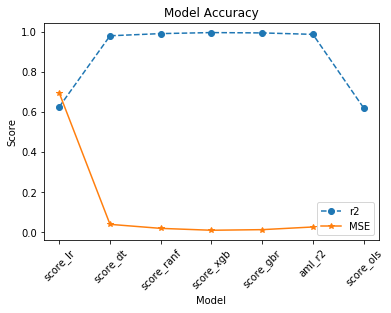

In [313]:
score_df['r2'].plot(linestyle = '--', marker = 'o')
score_df['MSE'].plot(linestyle = '-', marker = '*')
plt.xticks([0,1,2,3,4,5,6],scores_list, rotation = 45)
plt.title('Model Accuracy')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend()
plt.show()

In [65]:
# classification model

In [66]:
max(mcare1.total_actual_costs)

8135223068.14

In [67]:
mcare1['range_total_costs'] = mcare1.total_actual_costs

In [68]:
bins = [0, 1000000, 10000000, 500000000, 1000000000, 8000000000]
names = [1, 2, 3, 4, 5]

In [69]:
mcare1.range_total_costs = pd.cut(mcare1['range_total_costs'], bins, labels = names)

In [70]:
mcare1.range_total_costs.value_counts()

3    20170
2     3801
4      591
5      324
1      199
Name: range_total_costs, dtype: int64

In [71]:
mcare1.drop(['state','county','total_actual_costs'], axis = 1, inplace = True)

In [72]:
from sklearn import preprocessing

In [73]:
pr = preprocessing.LabelEncoder()#convert year into columns 1, 2, 3, ect

In [74]:
mcare1.year = pr.fit_transform(mcare1.year)

In [75]:
mcare1.year.value_counts()

7    3136
6    3136
5    3136
4    3136
3    3136
2    3136
1    3136
0    3136
Name: year, dtype: int64

In [76]:
X = mcare1.drop('range_total_costs', axis = 1)
y = mcare1.range_total_costs

In [77]:
from sklearn.preprocessing import StandardScaler
X.iloc[:,1:] = scaler.fit_transform(X.iloc[:,1:]).round(5)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.65, random_state = 1)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 

In [80]:
def model_fit(x):
    x.fit(X_test, y_test)
    y_pred = x.predict(X_train)
    model_fit.accuracy = accuracy_score(y_pred, np.array(y_train).astype('int'))
    print('Accuracy Score',accuracy_score(y_pred, np.array(y_train).astype('int')))
    print(classification_report(y_pred, np.array(y_train).astype('int')))
    print('Confusion Matrix \n',confusion_matrix(y_pred, np.array(y_train).astype('int')))

In [90]:
model_fit(KNeighborsClassifier(n_neighbors = 4))
KNN = model_fit.accuracy

Accuracy Score 0.8695899772209568


/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                      precision    recall  f1-score   support

-9223372036854775808       0.00      0.00      0.00         0
                   1       0.46      0.71      0.56        35
                   2       0.48      0.64      0.55      1050
                   3       0.95      0.90      0.92      7377
                   4       0.91      0.91      0.91       209
                   5       0.87      0.96      0.91       109

           micro avg       0.87      0.87      0.87      8780
           macro avg       0.61      0.69      0.64      8780
        weighted avg       0.89      0.87      0.88      8780

Confusion Matrix 
 [[   0    0    0    0    0    0]
 [   0   25   10    0    0    0]
 [   0   17  675  358    0    0]
 [   0   12  707 6640   18    0]
 [   0    0    0    3  190   16]
 [   3    0    0    0    1  105]]


In [82]:
from sklearn.linear_model import LogisticRegression
model_fit(LogisticRegression())
Logistic = model_fit.accuracy

Accuracy Score 0.9034168564920273


/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                      precision    recall  f1-score   support

-9223372036854775808       0.00      0.00      0.00         0
                   1       0.24      0.72      0.36        18
                   2       0.57      0.91      0.70       873
                   3       0.99      0.90      0.95      7680
                   4       0.34      0.89      0.49        80
                   5       0.91      0.85      0.88       129

           micro avg       0.90      0.90      0.90      8780
           macro avg       0.51      0.71      0.56      8780
        weighted avg       0.94      0.90      0.92      8780

Confusion Matrix 
 [[   0    0    0    0    0    0]
 [   0   13    4    1    0    0]
 [   0   28  793   52    0    0]
 [   0   13  595 6945  122    5]
 [   0    0    0    3   71    6]
 [   3    0    0    0   16  110]]


In [83]:
from sklearn.naive_bayes import GaussianNB
model_fit(GaussianNB())
Gaussian = model_fit.accuracy

Accuracy Score 0.7458997722095672


/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                      precision    recall  f1-score   support

-9223372036854775808       0.00      0.00      0.00         0
                   1       0.72      0.03      0.06      1220
                   2       0.96      0.65      0.78      2045
                   3       0.70      1.00      0.82      4886
                   4       0.98      0.39      0.55       529
                   5       0.76      0.92      0.83       100

           micro avg       0.75      0.75      0.75      8780
           macro avg       0.69      0.50      0.51      8780
        weighted avg       0.78      0.75      0.69      8780

Confusion Matrix 
 [[   0    0    0    0    0    0]
 [   0   39   50 1131    0    0]
 [   0   11 1337  697    0    0]
 [   0    4    5 4877    0    0]
 [   0    0    0  296  204   29]
 [   3    0    0    0    5   92]]


In [84]:
from sklearn import tree
model_fit(tree.DecisionTreeClassifier())
Tree = model_fit.accuracy

Accuracy Score 0.9685649202733485


/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                      precision    recall  f1-score   support

-9223372036854775808       0.00      0.00      0.00         0
                   1       0.83      0.71      0.77        63
                   2       0.91      0.91      0.91      1390
                   3       0.98      0.98      0.98      6991
                   4       0.96      0.93      0.94       215
                   5       0.94      0.94      0.94       121

           micro avg       0.97      0.97      0.97      8780
           macro avg       0.77      0.75      0.76      8780
        weighted avg       0.97      0.97      0.97      8780

Confusion Matrix 
 [[   0    0    0    0    0    0]
 [   0   45   18    0    0    0]
 [   0    8 1267  115    0    0]
 [   0    1  107 6878    5    0]
 [   0    0    0    8  200    7]
 [   3    0    0    0    4  114]]


In [85]:
from sklearn.ensemble import RandomForestClassifier
model_fit(RandomForestClassifier(n_estimators = 100, max_depth =10, random_state = 1))
RandomForest = model_fit.accuracy

Accuracy Score 0.975740318906606


/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                      precision    recall  f1-score   support

-9223372036854775808       0.00      0.00      0.00         0
                   1       0.74      0.93      0.82        43
                   2       0.93      0.93      0.93      1393
                   3       0.99      0.99      0.99      7012
                   4       0.97      0.94      0.96       216
                   5       0.92      0.96      0.94       116

           micro avg       0.98      0.98      0.98      8780
           macro avg       0.76      0.79      0.77      8780
        weighted avg       0.98      0.98      0.98      8780

Confusion Matrix 
 [[   0    0    0    0    0    0]
 [   0   40    3    0    0    0]
 [   0   10 1299   84    0    0]
 [   0    4   90 6914    4    0]
 [   0    0    0    3  203   10]
 [   3    0    0    0    2  111]]


In [86]:
from xgboost import XGBClassifier
model_fit(XGBClassifier())
XGBClassifier = model_fit.accuracy

Accuracy Score 0.9767653758542141


/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/m/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                      precision    recall  f1-score   support

-9223372036854775808       0.00      0.00      0.00         0
                   1       0.80      0.88      0.83        49
                   2       0.94      0.93      0.94      1397
                   3       0.99      0.99      0.99      7003
                   4       0.96      0.96      0.96       210
                   5       0.95      0.95      0.95       121

           micro avg       0.98      0.98      0.98      8780
           macro avg       0.77      0.78      0.78      8780
        weighted avg       0.98      0.98      0.98      8780

Confusion Matrix 
 [[   0    0    0    0    0    0]
 [   0   43    6    0    0    0]
 [   0    8 1304   85    0    0]
 [   0    3   82 6913    5    0]
 [   0    0    0    3  201    6]
 [   3    0    0    0    3  115]]


In [87]:
scores_list_1 = ['KNN','Logistic','Gaussian','Tree','RandomForest','XGBClassifier']
scores_1 = [KNN, Logistic, Gaussian, Tree, RandomForest, XGBClassifier]

In [88]:
score_df_classification = pd.DataFrame([scores_list_1, scores_1]).T

In [89]:
score_df_classification.index = score_df_classification[0]
del score_df_classification[0]
score_df_classification

,1
0,
KNN,0.86959
Logistic,0.903417
Gaussian,0.7459
Tree,0.968565
RandomForest,0.97574
XGBClassifier,0.976765
